In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [17]:
data = pd.read_csv('../all_stocks_5yr.csv')

In [18]:
data.head()

date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

In [58]:
data[data['Name']=='MMM'].close

380126    102.66
380127    102.62
380128    103.46
380129    102.86
380130    102.78
380131    103.23
380132    104.18
380133    103.15
380134    102.72
380135    103.54
380136    101.75
380137    102.31
380138    103.57
380139    104.00
380140    103.77
380141    103.28
380142    104.45
380143    104.66
380144    104.54
380145    105.71
380146    105.81
380147    105.13
380148    105.09
380149    106.02
380150    106.40
380151    105.41
380152    105.18
380153    105.66
380154    104.94
380155    106.42
           ...  
381355    235.45
381356    236.20
381357    235.72
381358    235.37
381359    235.64
381360    235.63
381361    238.71
381362    240.57
381363    239.79
381364    241.28
381365    241.14
381366    242.31
381367    244.47
381368    244.74
381369    248.11
381370    245.91
381371    248.18
381372    247.30
381373    246.31
381374    247.69
381375    252.36
381376    258.63
381377    256.01
381378    251.54
381379    250.50
381380    247.94
381381    245.17
381382    231.

In [41]:
cl = data[data['Name']=='MMM'].close
cl= cl.values

In [42]:
scl = MinMaxScaler()
#Scale the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

array([[0.00580061],
       [0.00554564],
       [0.01090005],
       ...,
       [0.82668281],
       [0.84064253],
       [0.83783784]])

In [43]:
#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


In [44]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 251 samples
Epoch 1/300
1000/1000 [==============================] - 1s 918us/step - loss: 0.0029 - val_loss: 0.0063
Epoch 2/300
1000/1000 [==============================] - 0s 330us/step - loss: 0.0081 - val_loss: 0.0024
Epoch 3/300
1000/1000 [==============================] - 0s 343us/step - loss: 0.0036 - val_loss: 0.0013
Epoch 4/300
1000/1000 [==============================] - 0s 330us/step - loss: 3.8737e-04 - val_loss: 0.0013
Epoch 5/300
1000/1000 [==============================] - 0s 325us/step - loss: 3.6991e-04 - val_loss: 7.7113e-04
Epoch 6/300
1000/1000 [==============================] - 0s 343us/step - loss: 5.9080e-04 - val_loss: 5.9526e-04
Epoch 7/300
1000/1000 [==============================] - 0s 333us/step - loss: 3.5216e-04 - val_loss: 9.7449e-04
Epoch 8/300
1000/1000 [==============================] - 0s 330us/step - loss: 4.3360e-04 - val_loss: 0.0011
Epoch 9/300
1000/1000 [==============================] - 0s 330us/step - loss: 6.

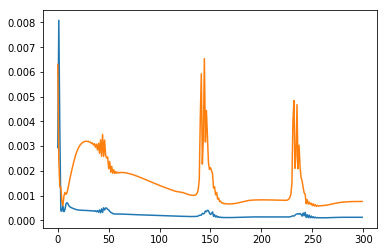

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [46]:
X_test[0]

array([[0.46959459],
       [0.46577002],
       [0.46800102],
       [0.46169046],
       [0.46717236],
       [0.46755482],
       [0.47176186]])

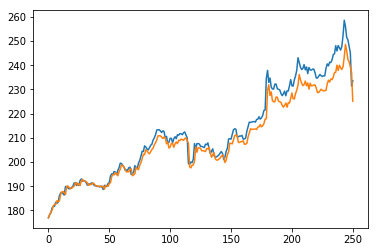

In [47]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [48]:
act = []
pred = []
#for i in range(250):
i=249
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[237.07936]], actual:[[231.44]]


In [56]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

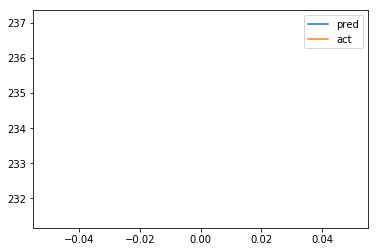

In [57]:
result_df.plot(kind='line')

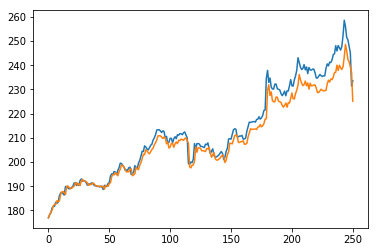

In [50]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))


In [51]:
X_test[249]

array([[0.96003315],
       [1.        ],
       [0.98329934],
       [0.95480622],
       [0.94817695],
       [0.93185875],
       [0.91420194]])

In [52]:
X_test[248]

array([[0.93026517],
       [0.96003315],
       [1.        ],
       [0.98329934],
       [0.95480622],
       [0.94817695],
       [0.93185875]])